## Online Retail Dataset

The dataset titled "Online Retail" is from Kaggle and it contains transactional data of an online retail store. The aim of the project was to analyse the online retail dataset and gain insights into customer segmentation and product performance. 

In [125]:
#iLoading all required Libraries
library(readxl) 
library(ggplot2)
library(gplots)
library(cluster)
library(stats)
library(dplyr)
library(ggplot2)
library(e1071)
library(fitdistrplus)
library(tidyr)
library(arules)
library(cowplot)
library(arulesViz)

### Load Dataset

In [126]:
file_path <- "/kaggle/input/online-retail/Online Retail.xlsx"

online_retail <- read_excel(file_path, sheet = "Online Retail")

I am using '***read_excel***' from '***readxl***' package to read the dataset from the file_path specified. 

The '***sheet***' argument specifies the name of the sheet in the Excel file containing the data(Here "Online Retail")

In [127]:
head(online_retail)

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
<chr>,<chr>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<chr>
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom


Description of the Columns:

**InvoiceNo**   : A unique identifier for each transaction.
<br>**StockCode**   : A unique identifier for each product.
<br>**Description** : A text description of the product.
<br>**Quantity**    : The quantity of the product sold in the transaction.
<br>**InvoiceDate** : The date and time when the transaction was made.
<br>**UnitPrice**   : The price of each unit of the product.
<br>**CustomerID**  : A unique identifier for each customer.
<br>**Country**     : Country of customer

## **EXPLORATORY DATA ANALYSIS**

In [128]:
summary(online_retail)

  InvoiceNo          StockCode         Description           Quantity        
 Length:541909      Length:541909      Length:541909      Min.   :-80995.00  
 Class :character   Class :character   Class :character   1st Qu.:     1.00  
 Mode  :character   Mode  :character   Mode  :character   Median :     3.00  
                                                          Mean   :     9.55  
                                                          3rd Qu.:    10.00  
                                                          Max.   : 80995.00  
                                                                             
  InvoiceDate                    UnitPrice           CustomerID    
 Min.   :2010-12-01 08:26:00   Min.   :-11062.06   Min.   :12346   
 1st Qu.:2011-03-28 11:34:00   1st Qu.:     1.25   1st Qu.:13953   
 Median :2011-07-19 17:17:00   Median :     2.08   Median :15152   
 Mean   :2011-07-04 13:34:57   Mean   :     4.61   Mean   :15288   
 3rd Qu.:2011-10-19 11:27:00   3rd Q

In [129]:
#Finding the total data points
total_data_points <- nrow(online_retail)
cat("Total data points: ", total_data_points)

Total data points:  541909

In [130]:
#Now finding the total unique countries
total_unique_countries <- length(unique(online_retail$Country))
cat("Total unique countries: ", total_unique_countries)

Total unique countries:  38

In [131]:
#Now finding the total unique countries
total_unique_description <- length(unique(online_retail$Description))
cat("Total unique descriptions: ", total_unique_description)

Total unique descriptions:  4212

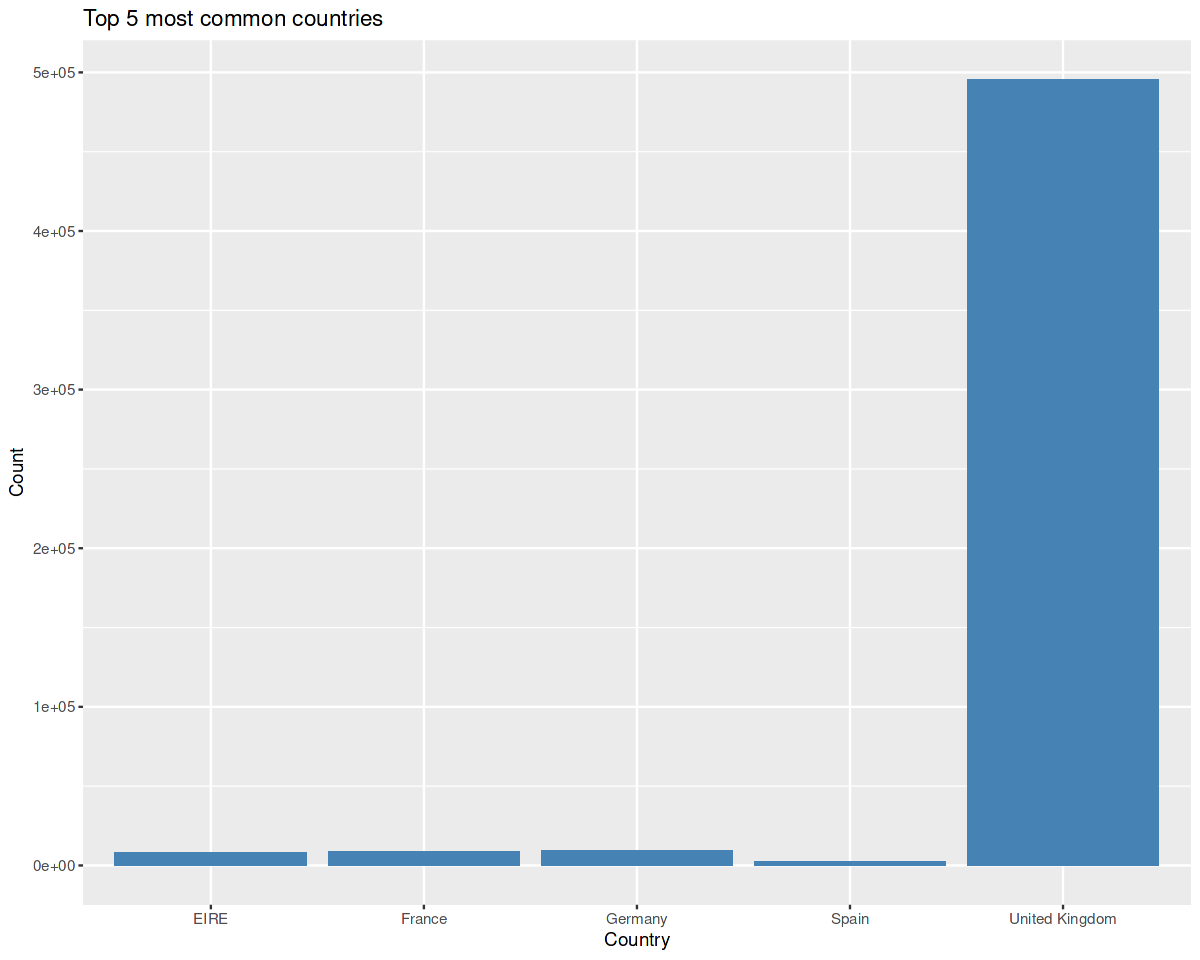

In [132]:
#Selecting Top 5 Common Countries
country_counts <- online_retail %>%
    count(Country) %>%
    arrange(desc(n))

top_countries <- head(country_counts,5)

ggplot(top_countries, aes(x=Country, y=n))+
    geom_bar(stat = "identity", fill= "steelblue")+
    labs(title = "Top 5 most common countries",
        x = "Country",
        y = "Count")

In [133]:
#Selecting Top 10 product descriptions
product_description_counts <- online_retail %>%
    count(Description) %>%
    arrange(desc(n))

top_product_descriptions <- head(product_description_counts,10)

top_product_descriptions

Description,n
<chr>,<int>
WHITE HANGING HEART T-LIGHT HOLDER,2369
REGENCY CAKESTAND 3 TIER,2200
JUMBO BAG RED RETROSPOT,2159
PARTY BUNTING,1727
LUNCH BAG RED RETROSPOT,1638
ASSORTED COLOUR BIRD ORNAMENT,1501
SET OF 3 CAKE TINS PANTRY DESIGN,1473
NA,1454
PACK OF 72 RETROSPOT CAKE CASES,1385


In [134]:
str(online_retail)

tibble [541,909 × 8] (S3: tbl_df/tbl/data.frame)
 $ InvoiceNo  : chr [1:541909] "536365" "536365" "536365" "536365" ...
 $ StockCode  : chr [1:541909] "85123A" "71053" "84406B" "84029G" ...
 $ Description: chr [1:541909] "WHITE HANGING HEART T-LIGHT HOLDER" "WHITE METAL LANTERN" "CREAM CUPID HEARTS COAT HANGER" "KNITTED UNION FLAG HOT WATER BOTTLE" ...
 $ Quantity   : num [1:541909] 6 6 8 6 6 2 6 6 6 32 ...
 $ InvoiceDate: POSIXct[1:541909], format: "2010-12-01 08:26:00" "2010-12-01 08:26:00" ...
 $ UnitPrice  : num [1:541909] 2.55 3.39 2.75 3.39 3.39 7.65 4.25 1.85 1.85 1.69 ...
 $ CustomerID : num [1:541909] 17850 17850 17850 17850 17850 ...
 $ Country    : chr [1:541909] "United Kingdom" "United Kingdom" "United Kingdom" "United Kingdom" ...


**str()** function checks the structure of the dataset, including the number of rows rows and columns, data types and varible names.

In [135]:
#check for missing values
sapply(online_retail, function(x) sum(is.na(x)))

InvoiceNo   StockCode Description    Quantity InvoiceDate   UnitPrice 
          0           0        1454           0           0           0 
 CustomerID     Country 
     135080           0

The are missing values in ***Description*** and ***CustomerID*** columns. I am addressing the missing values by removing teh rows

In [136]:
# Remove rows with missing values in Description column
online_retail <- na.omit(subset(online_retail, select = c(InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country)))

In [137]:
sapply(online_retail, function(x) sum(is.na(x)))

InvoiceNo   StockCode Description    Quantity InvoiceDate   UnitPrice 
          0           0           0           0           0           0 
 CustomerID     Country 
          0           0

All the misisng values are removed

In [138]:
head(online_retail)

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
<chr>,<chr>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<chr>
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom


### Creating a plot showing the top 50 customers with highest sales amount

In [139]:
#Calculating total sales for top 50 customers
CustomerSales <- online_retail %>%
                group_by(CustomerID) %>%
                summarize(total_sales = sum(Quantity * UnitPrice)) %>% 
                arrange(desc(total_sales))

In [140]:
#Selecting top 50 customers and plotting by sales amount
top_50_customers <- head(CustomerSales,50)

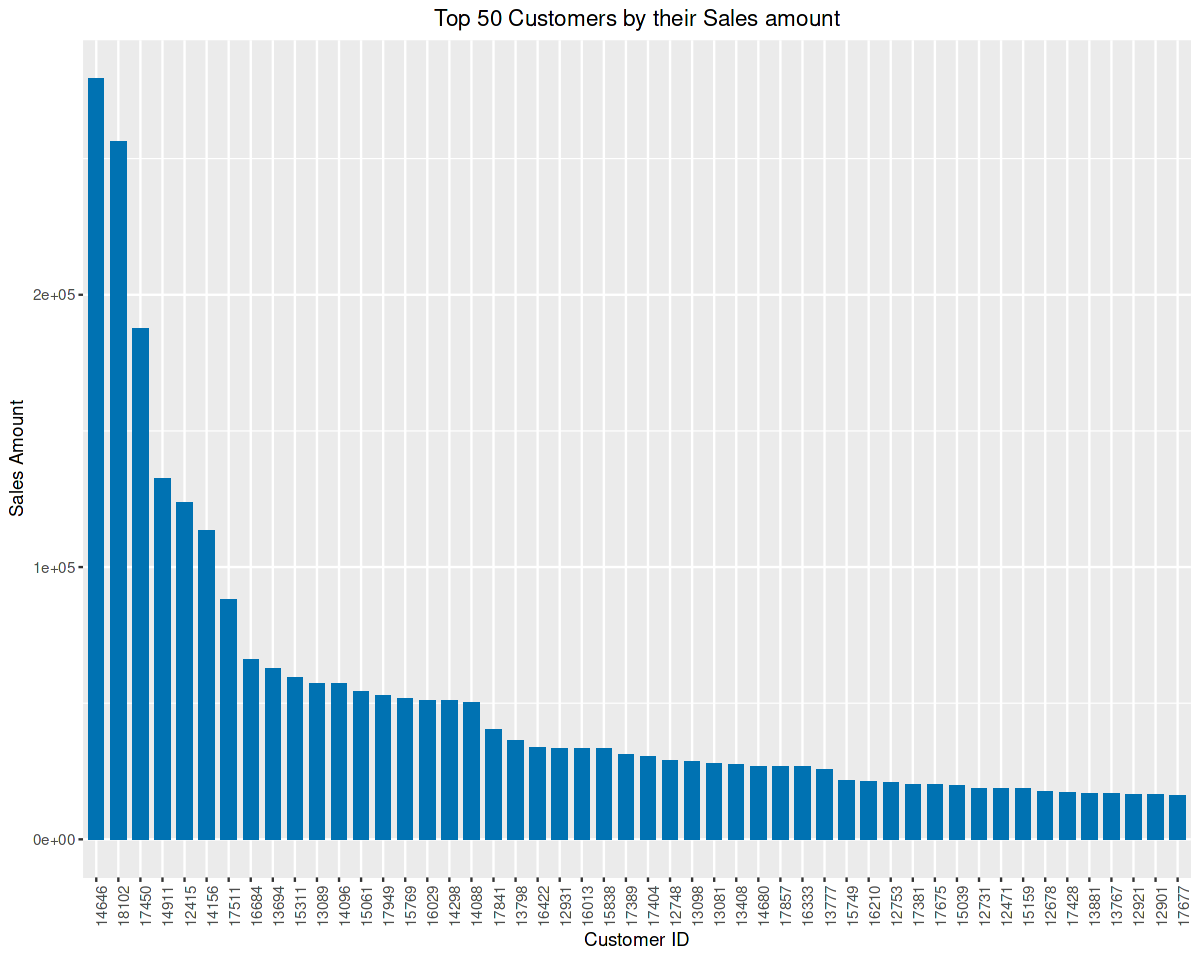

In [141]:
ggplot(top_50_customers, aes(x = reorder(CustomerID, -total_sales), y = total_sales)) +
    geom_bar(width = 0.7, stat = "identity", fill = "#0072B2")+
    ggtitle("Top 50 Customers by their Sales amount")+
    xlab("Customer ID")+
    ylab("Sales Amount")+
    theme(axis.text.x = element_text(angle = 90, vjust = 1.0, hjust=0.5),
        plot.title = element_text(hjust = 0.5))


Here, I calculated the total sales for the top 50 customers. The code uses **group_by** to group the dataset by CustomerID and calculated the totla sales for each customers by multiplying *Quantity* and *UnitPrice* columns. Then uses **summarize()** to create a new column called 'total_sales'. The results are arranged in descending order of total_sales. Then it is plotted.
<br>The x-axis is set to the reordered customer IDs and y-axis to sales amount. The **geom_bar()** function is used to create bar and **theme()** function is used to change the appearence , **axis.text.x** is used to rotate the x axis labels by 90 degrees, **vjust** and **hjust** to adjust vertical and horizontal positions of the labels

### Creating a pie chart showing percentage of total sales coming from internal market (ie from United Kingdom) versus external market

In [142]:
cs_df <- online_retail%>%
    filter(!is.na(CustomerID)) %>%
    mutate(amount = Quantity * UnitPrice) %>%
    group_by(CustomerID, Country) %>%
    summarize(amount = sum(amount), .groups = 'drop') %>%
    ungroup()
cs_df <- cs_df[!is.na(cs_df$Country), ]

In [143]:
#Creating a new column to identify if the customer is from UK or not
cs_df <- cs_df %>%
    mutate(Internal = ifelse(Country == "United Kingdom", "Yes", "No"))

In [144]:
market <- cs_df %>%
    group_by(Internal) %>%
    summarize(total_sales = sum(amount)) %>%
    arrange(desc(total_sales))

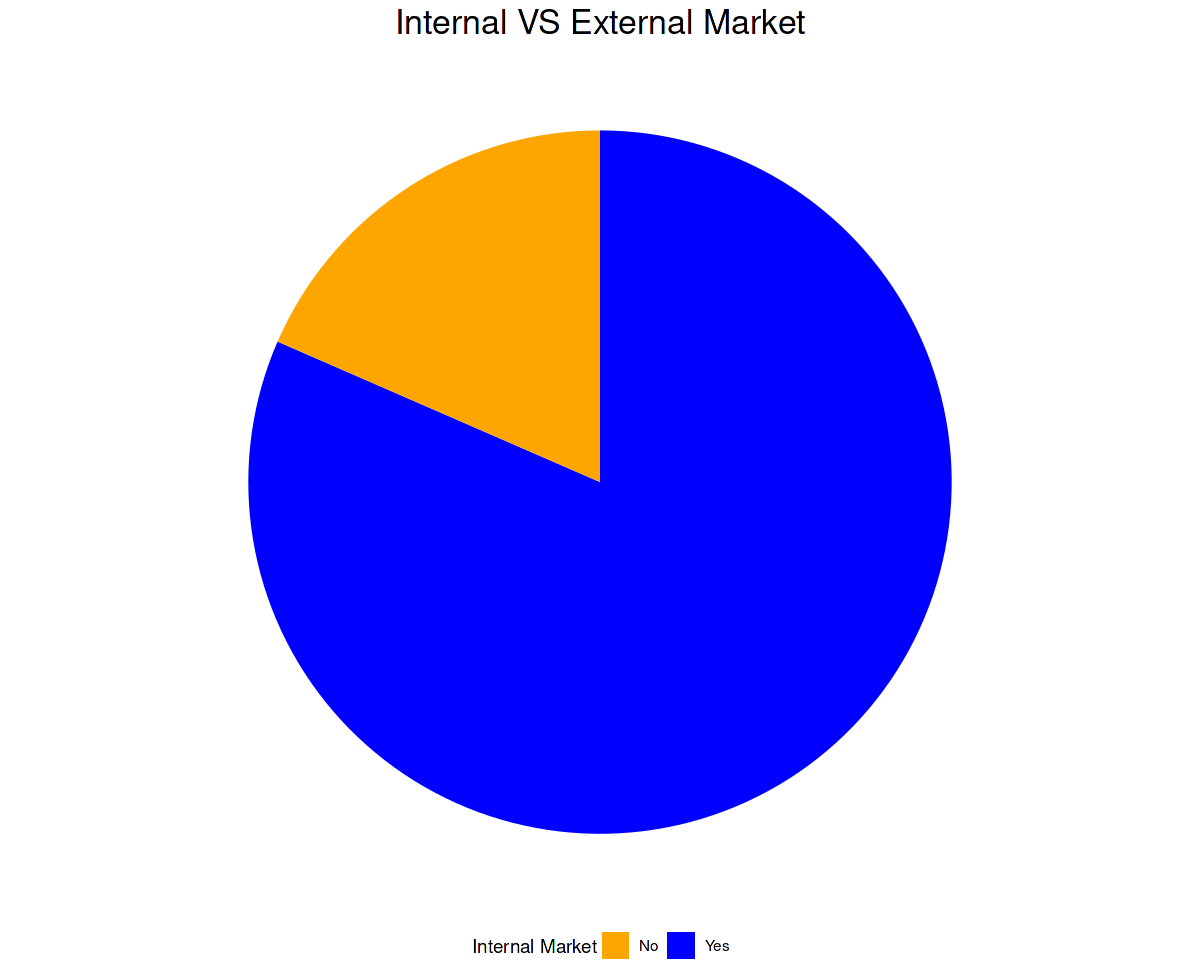

In [145]:
ggplot(market, aes(x="",y=total_sales, fill = Internal))+
    geom_bar(width = 1, stat = "identity")+
    coord_polar(theta = "y")+
    labs(fill = "Internal Market")+
    ggtitle("Internal VS External Market")+
    scale_fill_manual(values = c("No" = "Orange", "Yes" = "Blue"))+
    theme_void()+
    theme(plot.title = element_text(hjust = 0.5, size = 20),
        legend.position = "bottom")

The code here creates a pie chart to show the percentage of total sales coming from internal market (i.e cutomers from UK) versus external market.
<br>Calculated the total sales and grouped the data by customer and country. Then created a new column called "internal" that identifies if the customer is from UK or not. The *market* variable groups the datset by the Internal column and calculate the total sales amount for each group.
<br> The **theme_void()** function is used to remove the background and gridlines of the chart.


### Creating a plot for top 10 products in Sales amount

In [146]:
product_sales <- online_retail %>%
    mutate(amount = Quantity * UnitPrice) %>%
    group_by(Description) %>%
    summarize(sales_amount = sum(amount), num_events = n_distinct(InvoiceNo))

In [147]:
top_10_sales <- product_sales %>%
    arrange(desc(sales_amount)) %>%
    slice_head(n = 10)

In [148]:
percent_sales <- sum(top_10_sales$sales_amount) / sum(product_sales$sales_amount) *100
percent_events <- sum(top_10_sales$num_events) / sum(product_sales$num_events) *100

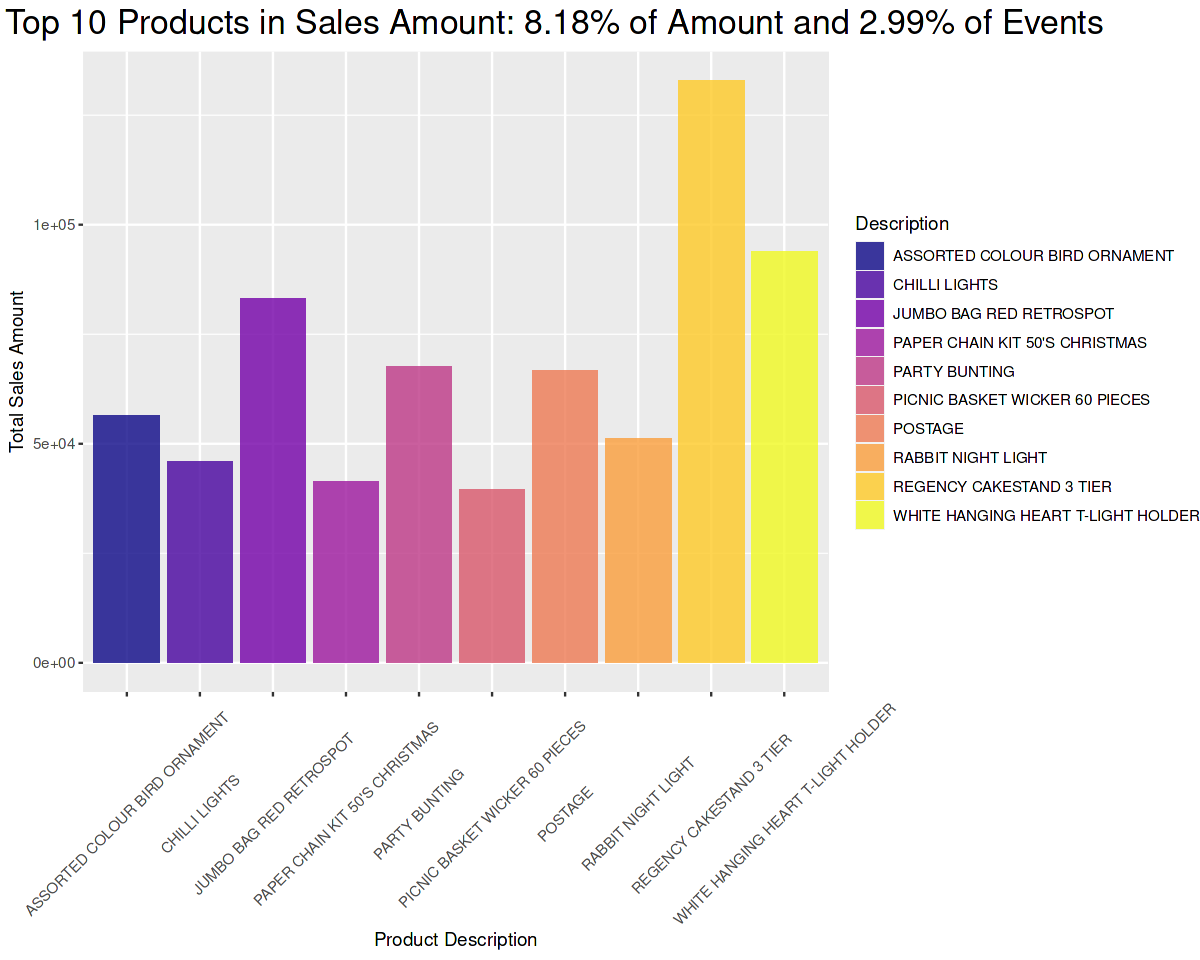

In [149]:
options(repr.plot.height = 8, repr.plot.width = 10)
ggplot(top_10_sales, aes(x = Description, y = sales_amount, fill = Description))+
    geom_bar(stat = "identity")+
    scale_fill_viridis_d(option = "plasma", alpha = 0.8) +
    ggtitle(paste0("                     Top 10 Products in Sales Amount: ", round(percent_sales, 2), "% of Amount and ", 
                 round(percent_events, 2), "% of Events")) +
    xlab("Product Description") +
    ylab("Total Sales Amount") +
    theme(plot.title = element_text(hjust = 0.5, size = 20),
        axis.text.x = element_text(angle = 45, vjust = 0.5))
    

Here, the data is grouped by Description and 2 new columns are created : *sales_amount* which is the sum of the amount variable for each description and *num_events* which is the number of distinct invoice numbers.
<br>The percentage of total sales amount and total number of events represented by the top 10 products are calculated and stored in 'percent_sales' and 'percent_events'. Then a bar chart is created. 

### **CUSTOMER SEGMENTATION**

Customer Segmentation is a technique used in marketing to group customers with similar charecteristics and behaviours together. It is performed to better understand and categorise customers. Since the dataset I am using is limited the sales records and it didn't include another information about the customers, I used RFM, Recency, Frequency and Monetary Values based model for finding the customer segments. 

**Recency**

In [150]:
online_retail$InvoiceDate <- as.Date(online_retail$InvoiceDate)

reference_date <- max(online_retail$InvoiceDate) + 1
online_retail$days_since_last_purchase <- as.numeric(difftime(reference_date, online_retail$InvoiceDate, units = "days"))

customer_history_df <- online_retail %>%
    group_by(CustomerID) %>%
    summarize(recency = min(days_since_last_purchase,na.rm = TRUE))

summary(customer_history_df$recency)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   17.00   51.00   92.58  144.00  374.00 

In [151]:
head(customer_history_df)

CustomerID,recency
<dbl>,<dbl>
12346,326
12347,3
12348,76
12349,19
12350,311
12352,37


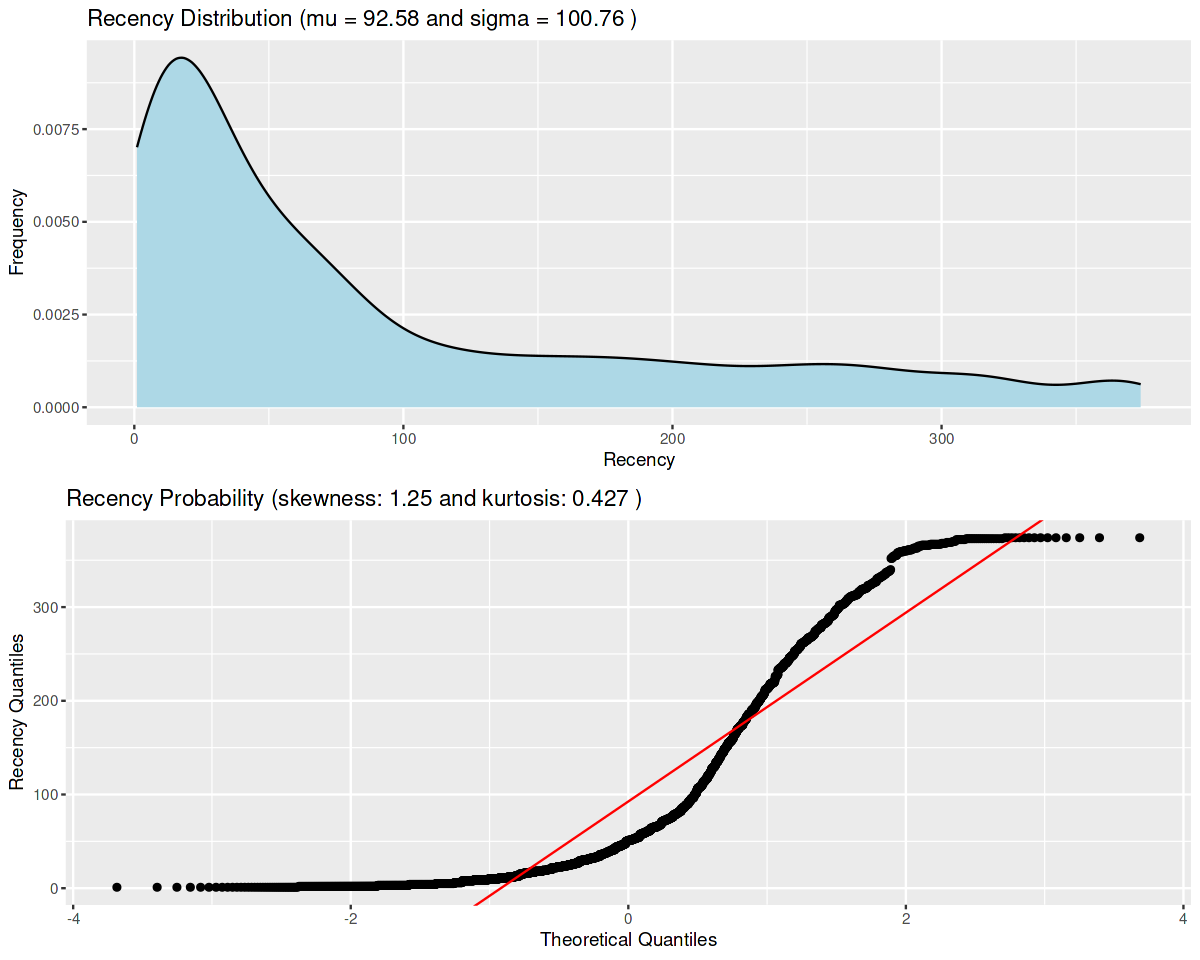

In [152]:
QQ_plot <- function(data, measure) {
  fit <- fitdistr(data, "normal")

  data_df <- data.frame(data)
  fig1 <- ggplot(data_df, aes(x = data)) +
    geom_density(fill = "lightblue", color = "black") +
    ggtitle(paste(measure, "Distribution (mu =", round(fit$estimate[1], 2), "and sigma =", round(fit$estimate[2], 2), ")")) +
    xlab(measure) +
    ylab("Frequency")

  # QQ plot
  fig2 <- ggplot(data_df, aes(sample = data)) +
    stat_qq() +
    geom_abline(slope = fit$estimate[2], intercept = fit$estimate[1], color = "red") +
    ggtitle(paste(measure, "Probability (skewness:", round(skewness(data), 2), "and kurtosis:", round(kurtosis(data), 3), ")")) +
    xlab("Theoretical Quantiles") +
    ylab(paste(measure, "Quantiles"))

  gridExtra::grid.arrange(fig1, fig2)
}

QQ_plot(customer_history_df$recency, "Recency")

**Monetary Values**

In [153]:
online_retail$MonetaryValue <- online_retail$Quantity * online_retail$UnitPrice

head(online_retail)

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,days_since_last_purchase,MonetaryValue
<chr>,<chr>,<chr>,<dbl>,<date>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,374,15.30
536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,374,20.34
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,374,22.00
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,374,20.34
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,374,20.34
536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01,7.65,17850,United Kingdom,374,15.30


In [154]:
customer_monetary_df <- online_retail %>%
    group_by(CustomerID) %>%
    summarize(MonetaryValue = sum(MonetaryValue,na.rm = TRUE))

In [155]:
summary(customer_monetary_df)

   CustomerID    MonetaryValue     
 Min.   :12346   Min.   : -4287.6  
 1st Qu.:13813   1st Qu.:   293.4  
 Median :15300   Median :   648.1  
 Mean   :15300   Mean   :  1898.5  
 3rd Qu.:16778   3rd Qu.:  1611.7  
 Max.   :18287   Max.   :279489.0  

In [156]:
head(customer_monetary_df)

CustomerID,MonetaryValue
<dbl>,<dbl>
12346,0.00
12347,4310.00
12348,1797.24
12349,1757.55
12350,334.40
12352,1545.41


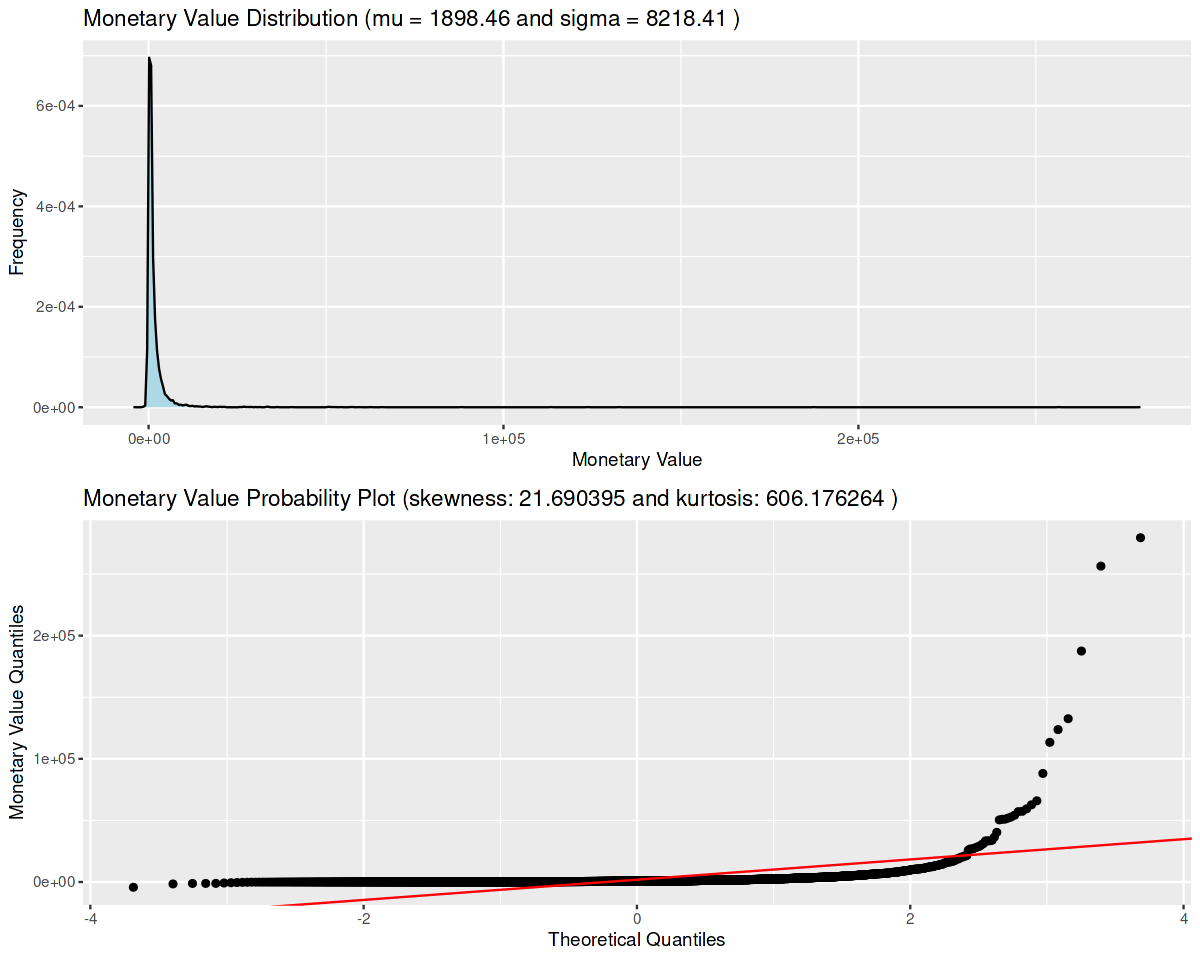

In [157]:
QQ_plot_monetary <- function(data, measure) {
  fit <- fitdistr(data, "normal")

  data_df <- data.frame(data)

  # Kernel Density plot
  fig1 <- ggplot(data_df, aes(x = data)) +
    geom_density(fill = "lightblue", color = "black") +
    ggtitle(paste(measure, "Distribution (mu =", round(fit$estimate[1], 2), "and sigma =", round(fit$estimate[2], 2), ")")) +
    xlab(measure) +
    ylab("Frequency")

  # QQ plot
  fig2 <- ggplot(data_df, aes(sample = data)) +
    stat_qq() +
    geom_abline(slope = fit$estimate[2], intercept = fit$estimate[1], color = "red") +
    ggtitle(paste(measure, "Probability Plot (skewness:", round(skewness(data), 6), "and kurtosis:", round(kurtosis(data), 6), ")")) +
    xlab("Theoretical Quantiles") +
    ylab(paste(measure, "Quantiles"))

  gridExtra::grid.arrange(fig1, fig2)
}

QQ_plot_monetary(customer_monetary_df$MonetaryValue, "Monetary Value")

In [158]:
customer_history_df <- merge(customer_history_df, customer_monetary_df, by = "CustomerID")

In [159]:
head(customer_history_df)

,CustomerID,recency,MonetaryValue
,<dbl>,<dbl>,<dbl>
1,12346,326,0.00
2,12347,3,4310.00
3,12348,76,1797.24
4,12349,19,1757.55
5,12350,311,334.40
6,12352,37,1545.41


**Frequency**

In [160]:
head(online_retail)

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,days_since_last_purchase,MonetaryValue
<chr>,<chr>,<chr>,<dbl>,<date>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,374,15.30
536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,374,20.34
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,374,22.00
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,374,20.34
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,374,20.34
536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01,7.65,17850,United Kingdom,374,15.30


In [161]:
# I am calculating purchase frequency for each customer
customer_frequency_df <- online_retail %>%
  group_by(CustomerID) %>%
  summarize(Frequency = n_distinct(InvoiceNo))

summary(customer_frequency_df$Frequency)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   3.000   5.075   5.000 248.000 

In [162]:
head(customer_frequency_df)

CustomerID,Frequency
<dbl>,<int>
12346,2
12347,7
12348,4
12349,1
12350,1
12352,11


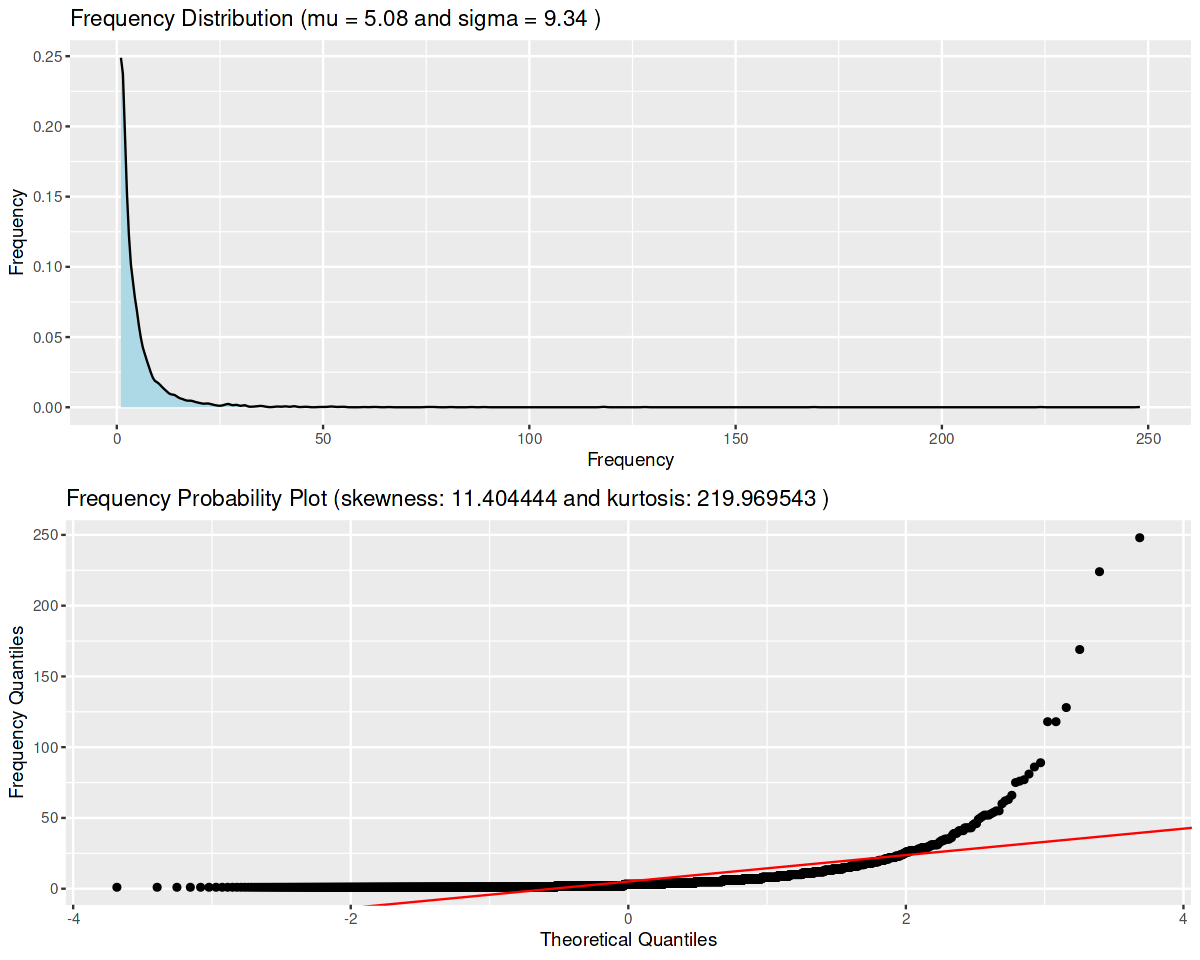

In [163]:
QQ_plot_frequency <- function(data, measure) {
  fit <- fitdistr(data, "normal")

  data_df <- data.frame(data)

  # Kernel Density plot
  fig1 <- ggplot(data_df, aes(x = data)) +
    geom_density(fill = "lightblue", color = "black") +
    ggtitle(paste(measure, "Distribution (mu =", round(fit$estimate[1], 2), "and sigma =", round(fit$estimate[2], 2), ")")) +
    xlab(measure) +
    ylab("Frequency")

  # QQ plot
  fig2 <- ggplot(data_df, aes(sample = data)) +
    stat_qq() +
    geom_abline(slope = fit$estimate[2], intercept = fit$estimate[1], color = "red") +
    ggtitle(paste(measure, "Probability Plot (skewness:", round(skewness(data), 6), "and kurtosis:", round(kurtosis(data), 6), ")")) +
    xlab("Theoretical Quantiles") +
    ylab(paste(measure, "Quantiles"))

  gridExtra::grid.arrange(fig1, fig2)
}

QQ_plot_frequency(customer_frequency_df$Frequency, "Frequency")

In [164]:
# Merging customer_freq and customer_monetary_val data frames
customer_history_df <- merge(customer_history_df, customer_frequency_df,by = "CustomerID")

In [165]:
head(customer_history_df)

,CustomerID,recency,MonetaryValue,Frequency
,<dbl>,<dbl>,<dbl>,<int>
1,12346,326,0.00,2
2,12347,3,4310.00,7
3,12348,76,1797.24,4
4,12349,19,1757.55,1
5,12350,311,334.40,1
6,12352,37,1545.41,11


In [166]:
summary(customer_history_df)

   CustomerID       recency       MonetaryValue        Frequency      
 Min.   :12346   Min.   :  1.00   Min.   : -4287.6   Min.   :  1.000  
 1st Qu.:13813   1st Qu.: 17.00   1st Qu.:   293.4   1st Qu.:  1.000  
 Median :15300   Median : 51.00   Median :   648.1   Median :  3.000  
 Mean   :15300   Mean   : 92.58   Mean   :  1898.5   Mean   :  5.075  
 3rd Qu.:16778   3rd Qu.:144.00   3rd Qu.:  1611.7   3rd Qu.:  5.000  
 Max.   :18287   Max.   :374.00   Max.   :279489.0   Max.   :248.000  

In [167]:
k_values <- 1:10 # specifying range of k values to test
wss <- vector("numeric", length = length(k_values)) # initializing vector to store within-cluster sum of squares (WSS)

In [168]:
for (i in 1:length(k_values)) {
  k <- k_values[i]
  set.seed(123) # for reproducibility
  kmeans_model <- kmeans(customer_history_df[, c("recency", "MonetaryValue", "Frequency")], centers = k)
  wss[i] <- kmeans_model$tot.withinss # store WSS for current k value
}

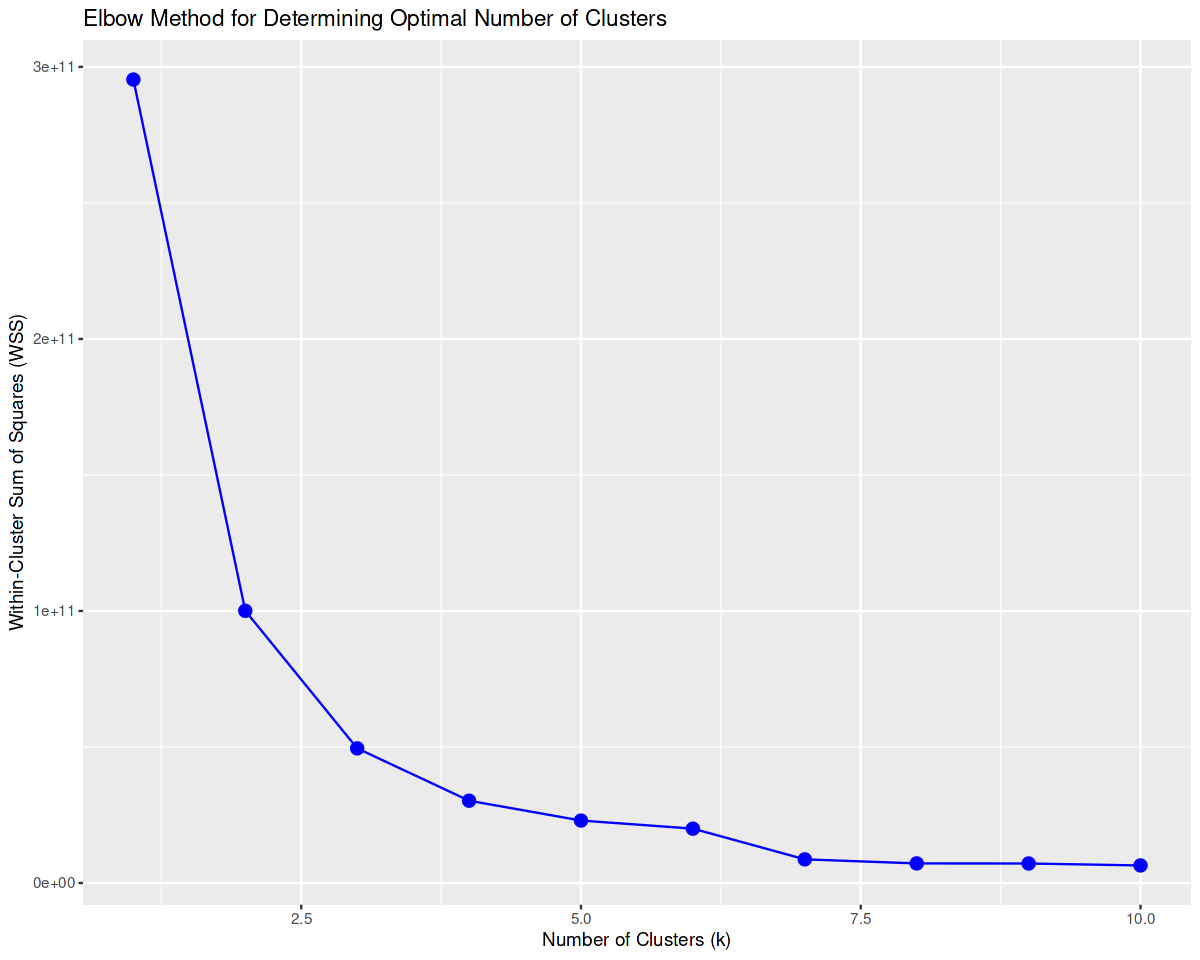

In [169]:
ggplot() +
  geom_line(aes(x = k_values, y = wss), color = "blue") +
  geom_point(aes(x = k_values, y = wss), color = "blue", size = 3) +
  labs(title = "Elbow Method for Determining Optimal Number of Clusters",
       x = "Number of Clusters (k)",
       y = "Within-Cluster Sum of Squares (WSS)") 

In [170]:
elbow_point <- k_values[which(diff(wss) == max(diff(wss))) + 1]
cat("Optimal k value based on Elbow Method: ", elbow_point, "\n")

Optimal k value based on Elbow Method:  9 


In [171]:
# Performing k-means clustering with optimal k value
k_optimal <- elbow_point

In [172]:
set.seed(123) # for reproducibility
kmeans_model <- kmeans(customer_history_df[, c("recency", "MonetaryValue", "Frequency")], centers = k_optimal)

In [173]:
customer_history_df$Cluster <- as.factor(kmeans_model$cluster)

In [174]:
# Summarize the results
cluster_summary <- customer_history_df %>%
  group_by(Cluster) %>%
  summarize(
    Mean_Recency = mean(recency),
    Mean_MonetaryValue = mean(MonetaryValue),
    Mean_Frequency = mean(Frequency)
  )

print(cluster_summary)

# A tibble: 9 × 4
  Cluster Mean_Recency Mean_MonetaryValue Mean_Frequency
  <fct>          <dbl>              <dbl>          <dbl>
1 1               7                30721.          58.8 
2 2             112.                 532.           2.51
3 3              11.5             139291.          98.8 
4 4               1.5             267964.          69.5 
5 5               7.42             58473.          56.5 
6 6              17.1              13792.          27.1 
7 7             219.               -1545.           1.71
8 8              41.9               2530.           7.94
9 9              23.4               6222.          16.9 


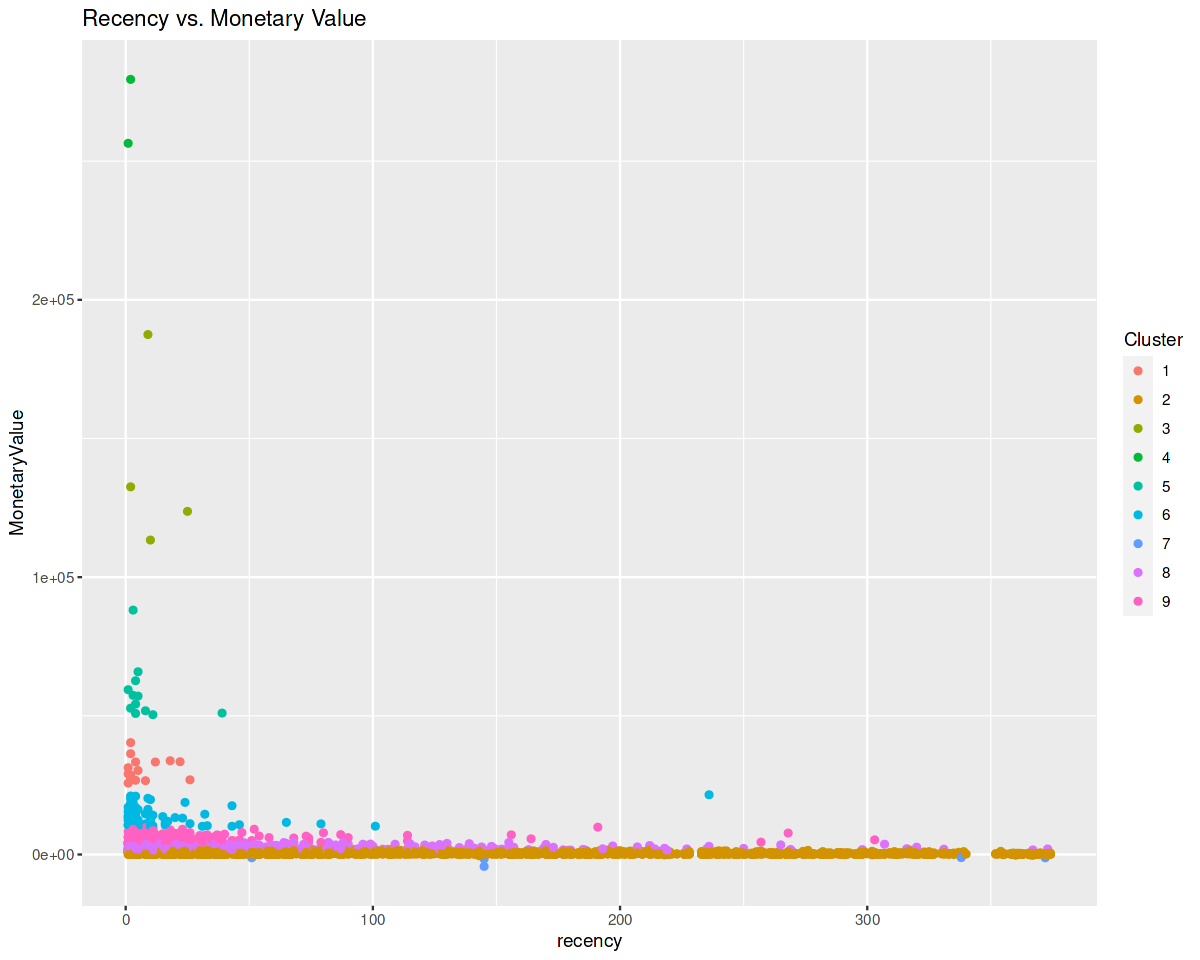

In [175]:
p1 <- ggplot(customer_history_df, aes(x = recency, y = MonetaryValue, color = Cluster)) +
  geom_point() +
  labs(title = "Recency vs. Monetary Value", color = "Cluster") 

plot_grid(p1)

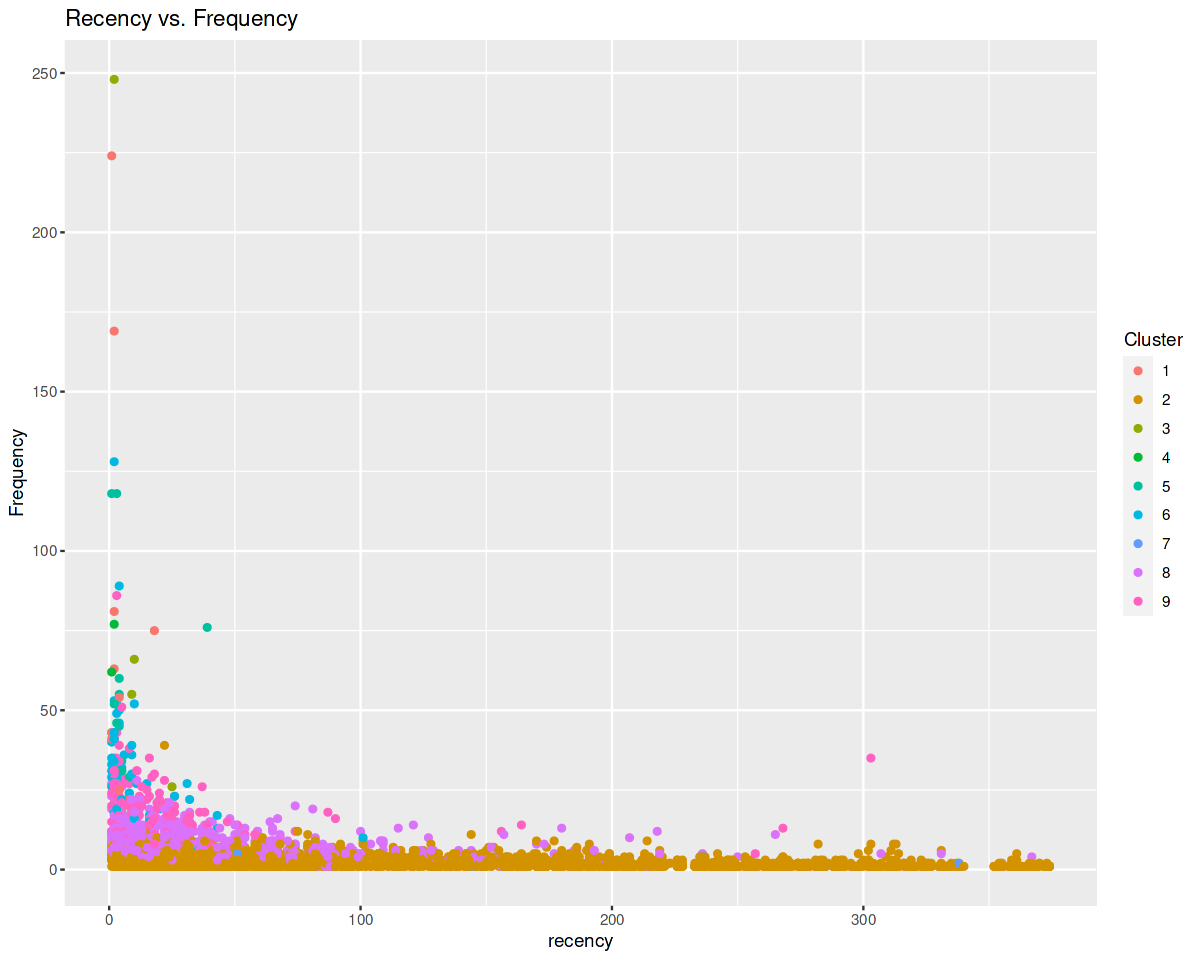

In [176]:
p2 <- ggplot(customer_history_df, aes(x = recency, y = Frequency, color = Cluster)) +
  geom_point() +
  labs(title = "Recency vs. Frequency", color = "Cluster") 

plot_grid(p2)

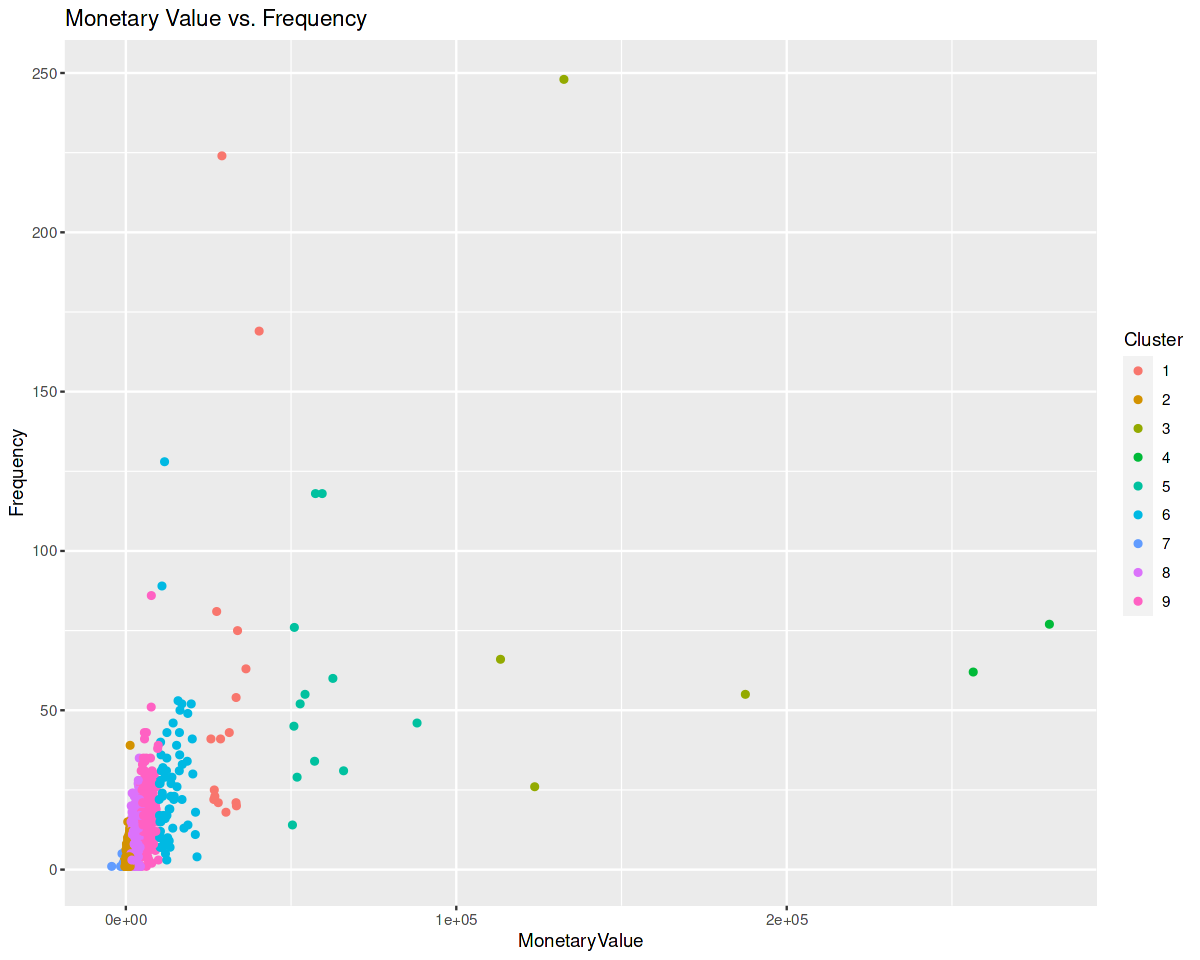

In [177]:
p3 <- ggplot(customer_history_df, aes(x = MonetaryValue, y = Frequency, color = Cluster)) +
  geom_point() +
  labs(title = "Monetary Value vs. Frequency", color = "Cluster") 

plot_grid(p3)

In [178]:
cor_recency_monetary <- cor(customer_history_df$recency, customer_history_df$MonetaryValue)
cor_recency_frequency <- cor(customer_history_df$recency, customer_history_df$Frequency)
cor_monetary_frequency <- cor(customer_history_df$MonetaryValue, customer_history_df$Frequency)

In [179]:
cor_recency_monetary

[1] -0.132109

In [180]:
cor_recency_frequency

[1] -0.25954

In [181]:
cor_monetary_frequency

[1] 0.566122

In [182]:
customer_history_df %>%
  group_by(Cluster) %>%
  summarize(avg_recency = mean(recency),
            avg_MonetaryValue = mean(MonetaryValue),
            avg_Frequency = mean(Frequency))

Cluster,avg_recency,avg_MonetaryValue,avg_Frequency
<fct>,<dbl>,<dbl>,<dbl>
1,7.000000,30720.7694,58.812500
2,112.344710,531.8134,2.505430
3,11.500000,139291.0950,98.750000
4,1.500000,267963.7550,69.500000
5,7.416667,58472.5442,56.500000
6,17.063492,13792.0517,27.126984
7,219.142857,-1545.1771,1.714286
8,41.922799,2530.2737,7.944511
9,23.449074,6222.4843,16.921296


Visualization and Reporting:
<br>Creating additional visualizations, to  explore the findings from the analysis. I created a heatmap

In [183]:
# Setting the width and height
width <- 13
height <- 8
options(repr.plot.width=width, repr.plot.height=height)


In [184]:
recency_data <- subset(customer_history_df, select = c("Cluster", "recency"))
frequency_data <- subset(customer_history_df, select = c("Cluster", "Frequency"))
monetary_value_data <- subset(customer_history_df, select = c("Cluster", "MonetaryValue"))

In [185]:
recency_mean <- aggregate(recency_data$recency, by = list(recency_data$Cluster), FUN = mean)
frequency_mean <- aggregate(frequency_data$Frequency, by = list(frequency_data$Cluster), FUN = mean)
monetary_value_mean <- aggregate(monetary_value_data$MonetaryValue, by = list(monetary_value_data$Cluster), FUN = mean)

In [186]:
# Creating a matrix of means for the above obtained recency, frequency, and monetary value
mean_matrix <- matrix(c(recency_mean$x, frequency_mean$x, monetary_value_mean$x), nrow = length(unique(customer_history_df$Cluster)), byrow = FALSE)

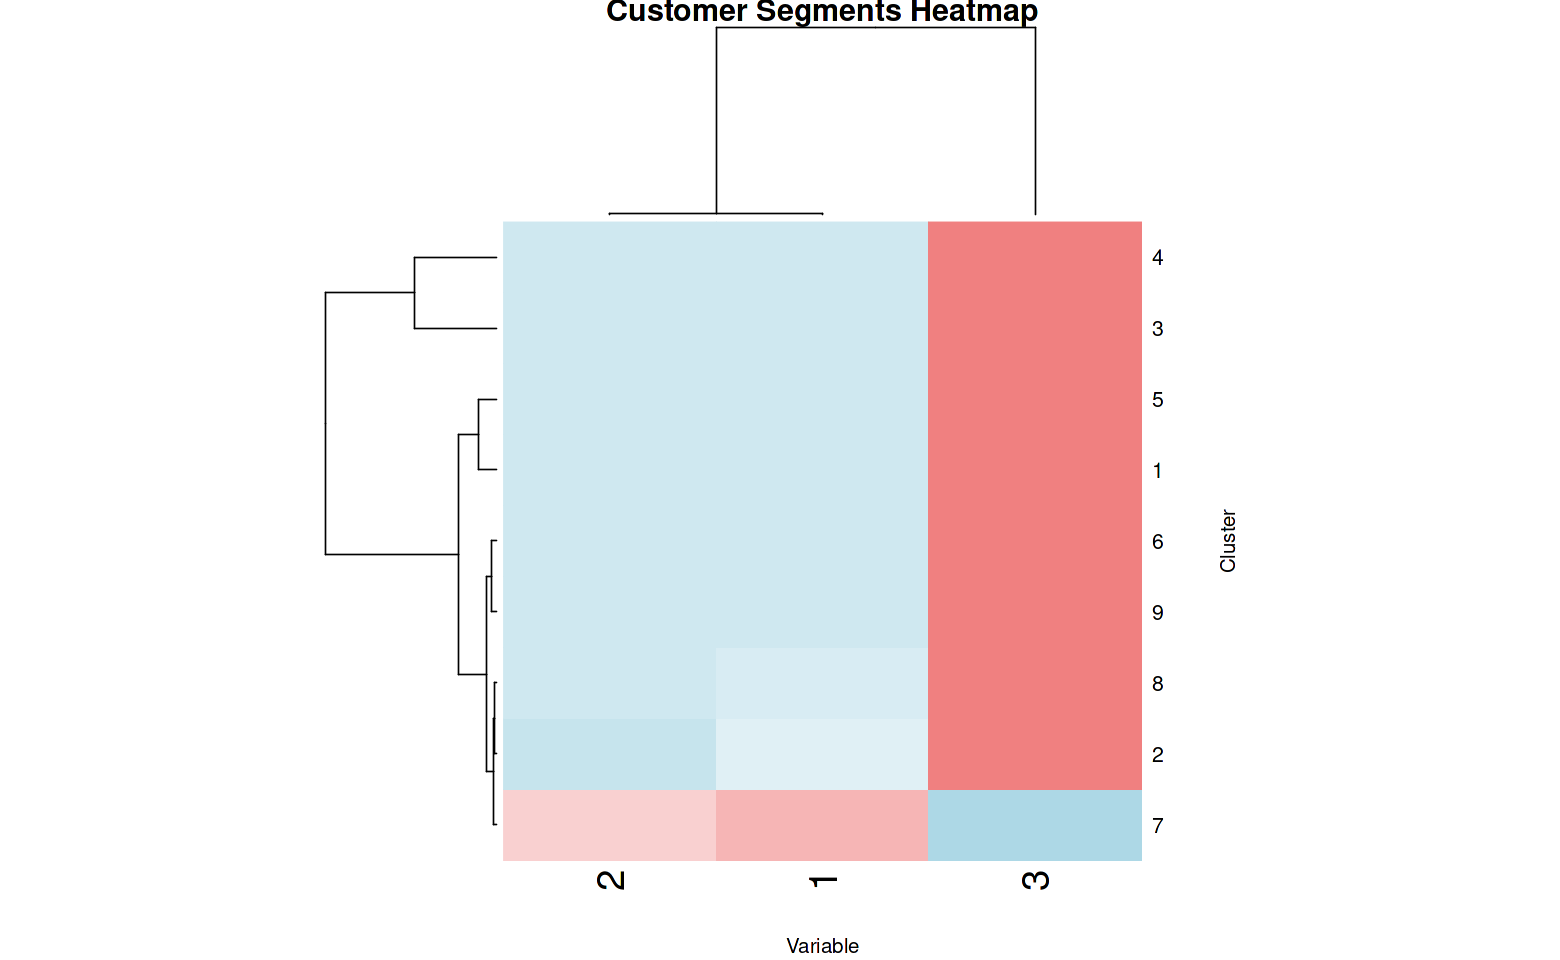

In [187]:
heatmap(mean_matrix,
        col = colorRampPalette(c("lightblue", "white", "lightcoral"))(20),  # Defining color palette
        main = "Customer Segments Heatmap",  
        xlab = "Variable",  
        ylab = "Cluster"  
)

In [188]:
head(online_retail)

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,days_since_last_purchase,MonetaryValue
<chr>,<chr>,<chr>,<dbl>,<date>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,374,15.30
536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,374,20.34
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,374,22.00
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,374,20.34
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,374,20.34
536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01,7.65,17850,United Kingdom,374,15.30


**Market Basket Analysis**
<br>Now I am performing pruning to filter and select data based on certain criteria. First I pruned based on the total sales percentage. Then 
based on the rank of items and based on list of features. 

In [189]:
prune_dataset <- function(data, total_sales_perc = 0.5, start_rank = NULL, end_rank = NULL, TopCols = NULL) {
  
  # Pruning based on percentage of total sales
  if (!is.null(total_sales_perc)) {
    total_sales_cutoff <- sum(data$MonetaryValue) * total_sales_perc
    data <- data %>% dplyr::filter(cumsum(data$MonetaryValue) <= total_sales_cutoff)
  }
  
  # Pruning based on ranks of items
  if (!is.null(start_rank) && !is.null(end_rank)) {
    data <- data %>% dplyr::filter(rank >= start_rank & rank <= end_rank)
  }
  
  # Pruning based on list of features
  if (!is.null(TopCols)) {
    data <- data %>% dplyr::select(all_of(TopCols))
  }
  
  return(data)
}

In [190]:
pruned_data <- prune_dataset(online_retail, end_rank = 15)

In [191]:
# Calculating the total sales amount, number of sales events, and number of products
total_sales_amount <- sum(pruned_data$MonetaryValue)
num_sales_events <- nrow(pruned_data)
num_products <- ncol(pruned_data) - 2

In [192]:
cat("Total of Sales Amount by the Top 15 Products in Sales Events (Invoice):", total_sales_amount, "\n")
cat("Number of Sales Events:", num_sales_events, "\n")
cat("Number of Products:", num_products, "\n")
print(pruned_data)

Total of Sales Amount by the Top 15 Products in Sales Events (Invoice): 4149993 
Number of Sales Events: 198602 
Number of Products: 8 
# A tibble: 198,602 × 10
   InvoiceNo StockC…¹ Descr…² Quant…³ InvoiceD…⁴ UnitP…⁵ Custo…⁶ Country days_…⁷
   <chr>     <chr>    <chr>     <dbl> <date>       <dbl>   <dbl> <chr>     <dbl>
 1 536365    85123A   WHITE …       6 2010-12-01    2.55   17850 United…     374
 2 536365    71053    WHITE …       6 2010-12-01    3.39   17850 United…     374
 3 536365    84406B   CREAM …       8 2010-12-01    2.75   17850 United…     374
 4 536365    84029G   KNITTE…       6 2010-12-01    3.39   17850 United…     374
 5 536365    84029E   RED WO…       6 2010-12-01    3.39   17850 United…     374
 6 536365    22752    SET 7 …       2 2010-12-01    7.65   17850 United…     374
 7 536365    21730    GLASS …       6 2010-12-01    4.25   17850 United…     374
 8 536366    22633    HAND W…       6 2010-12-01    1.85   17850 United…     374
 9 536366    22632    HAND W…

In [193]:
# Converting the data to transactions format
trans <- as(online_retail, "transactions")

Warning message:
“Column(s) 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 not logical or factor. Applying default discretization (see '? discretizeDF').”


In [194]:
# Performing market basket analysis using Apriori algorithm with support = 0.005, confidence = 0.8 and minimum length = 4
rules <- apriori(trans, parameter = list(support = 0.005, confidence = 0.8, minlen = 4))


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.005      4
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 2034 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[30116 item(s), 406829 transaction(s)] done [1.36s].
sorting and recoding items ... [65 item(s)] done [0.02s].
creating transaction tree ... done [0.20s].
checking subsets of size 1 2 3 4 5 6 done [0.01s].
writing ... [791 rule(s)] done [0.00s].
creating S4 object  ... done [0.03s].


In [195]:
# Sorting the rules by Lift
rules <- sort(rules, by = "lift", decreasing = TRUE)


In [196]:
top_rules <- head(rules, n = 20)

In [197]:
# Printing the top 20 rules
for (i in 1:length(top_rules)) {
  cat("Rule #", i, ":\n")
  cat(paste0(labels(lhs(top_rules))[i], " => ", labels(rhs(top_rules))[i]), "\n")
  cat("Support: ", top_rules@quality[i, "support"], " - Confidence: ", top_rules@quality[i, "confidence"], " - Lift: ", top_rules@quality[i, "lift"], "\n")
  cat(rep("-", 80), "\n")  # Add line separator
}


Rule # 1 :
{UnitPrice=[2.95,3.9e+04],CustomerID=[1.23e+04,1.44e+04),days_since_last_purchase=[1,72),MonetaryValue=[-1.68e+05,6.2)} => {Quantity=[-8.1e+04,2)} 
Support:  0.006363853  - Confidence:  0.9353324  - Lift:  4.628131 
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Rule # 2 :
{UnitPrice=[2.95,3.9e+04],CustomerID=[1.23e+04,1.44e+04),Country=United Kingdom,days_since_last_purchase=[1,72),MonetaryValue=[-1.68e+05,6.2)} => {Quantity=[-8.1e+04,2)} 
Support:  0.00561661  - Confidence:  0.933415  - Lift:  4.618644 
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Rule # 3 :
{UnitPrice=[2.95,3.9e+04],CustomerID=[1.23e+04,1.44e+04),MonetaryValue=[-1.68e+05,6.2)} => {Quantity=[-8.1e+04,2)} 
Support:  0.01523736  - Confidence:  0.9048314  - Lift:  4.477209 
- - - - -

In [198]:
# Creating a data frame to store the top 20 rules and their quality measures
top_rules_df <- data.frame(
  Rule = paste(labels(lhs(top_rules)), "=>", labels(rhs(top_rules))),
  Support = top_rules@quality[, "support"],
  Confidence = top_rules@quality[, "confidence"],
  Lift = top_rules@quality[, "lift"]
)


In [199]:
top_rules_df <- gather(top_rules_df, key = "Variable", value = "Value", -Rule)

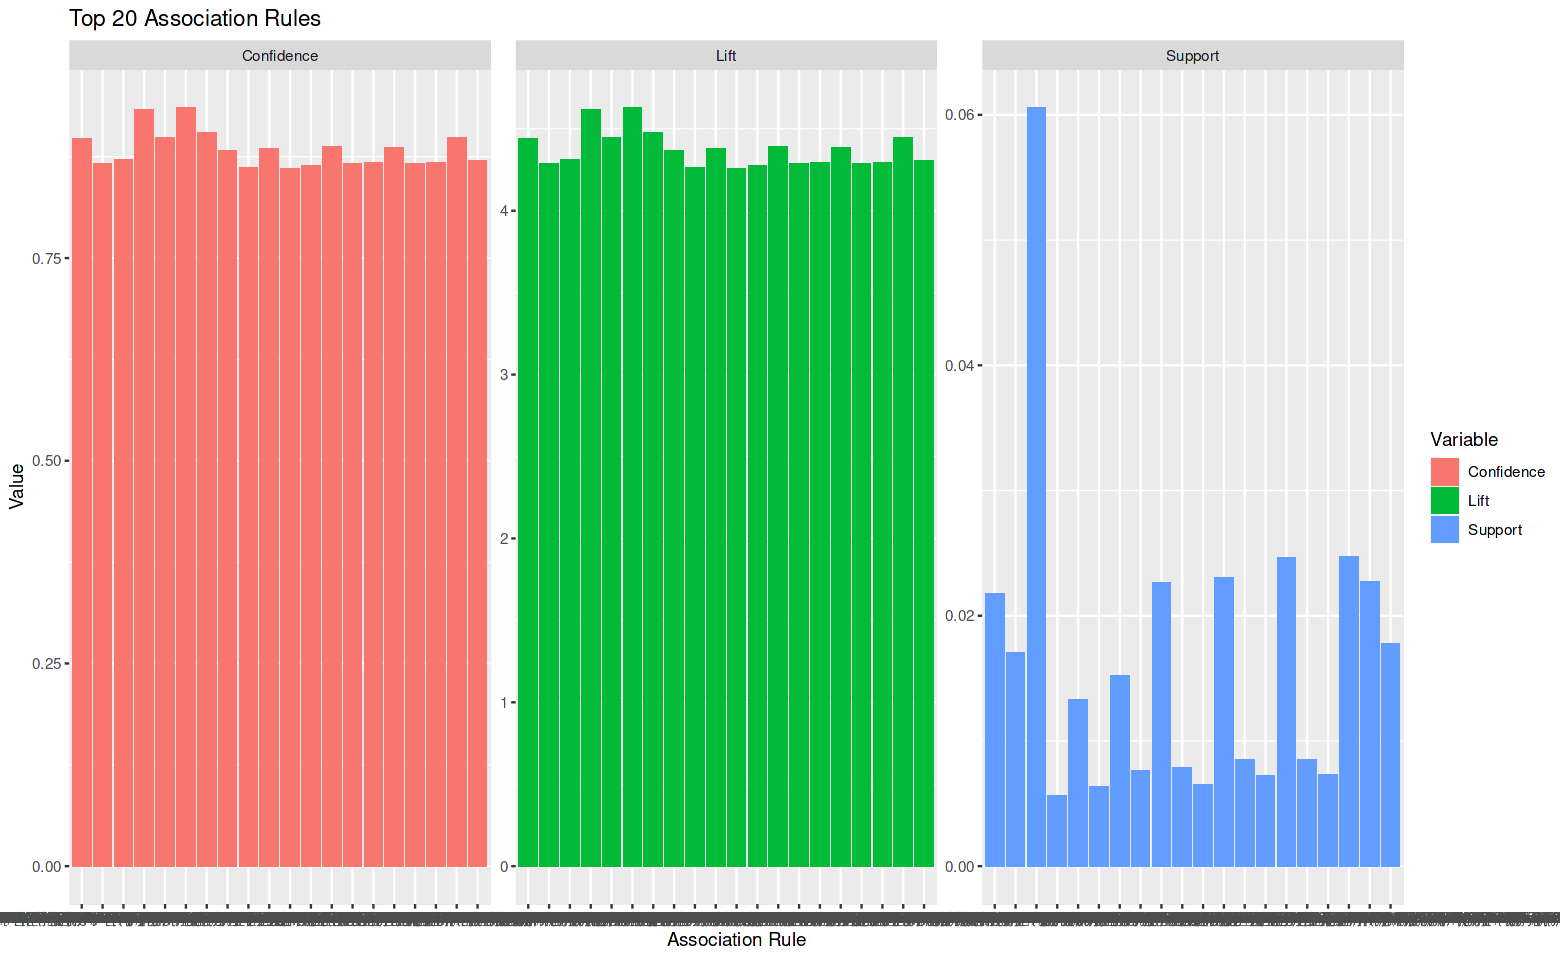

In [200]:
# Creating a bar chart for support, confidence, and lift
ggplot(top_rules_df, aes(x = Rule, y = Value, fill = Variable)) +
  geom_bar(stat = "identity", position = "dodge") +
  facet_wrap(~Variable, scales = "free_y", nrow = 1) +
  labs(title = "Top 20 Association Rules",
       x = "Association Rule",
       y = "Value") 
